In [54]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime as dt
from flask import jsonify

# Import Tables with sqlite3 as Alchemy is not a requirement

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlite3


In [56]:
 #connect
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()

# Exploratory Climate Analysis

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Find the highest date in the DB
cur.execute("SELECT MAX(date) FROM measurement")
max_date=cur.fetchall()
#Convert to a string
date_str=max_date[0][0]
#Convert to a date format
date_dt=dt.strptime(date_str,'%Y-%m-%d')
#Subtract a year to find the date for the query
new_date=date_dt.replace(date_dt.year-1)
#convert back to string
new_str=new_date.strftime('%Y-%m-%d')

# Select the date and precipitaiton level from the db
cur.execute(f"SELECT date, prcp FROM measurement WHERE date > '{new_str}'")
rows=cur.fetchall()

#Make a dataframe
climate_df=pd.DataFrame(data=rows, columns=["Date","Precipitation"])
climate_df.set_index("Date",inplace=True)
climate_df.sort_index(ascending=True,inplace=True)
#I've made the decision to intrepet nulls as 0s
climate_df.fillna(value=0, inplace=True)

# Make a group by dataframe for use in a graph
climate_group=climate_df.groupby("Date").max()

#Show the grouped data
climate_group.head()

,Precipitation
Date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07


<Figure size 432x288 with 0 Axes>

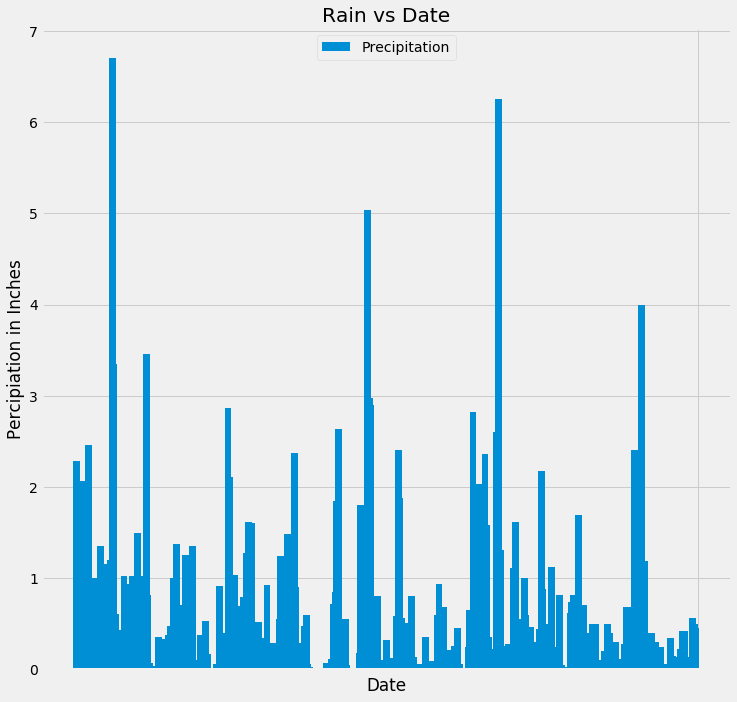

In [58]:
#Make a bar graph
plt.figure(1)
plt.figure(figsize=(11,11))
plt.bar(climate_group.index,climate_group["Precipitation"], width=4)

# Add title and labels
plt.ylabel('Percipiation in Inches')
plt.xlabel('Date')
plt.title("Rain vs Date")

#Remove the xticks on the bottom
plt.xticks('')

plt.legend(["Precipitation"],loc=9)

plt.show()

In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [60]:
# Design a query to show how many stations are available in this dataset?
cur.execute(f"SELECT COUNT(DISTINCT station) FROM measurement")
cur.fetchall()

[(9,)]

In [61]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
cur.execute(f"SELECT station, COUNT(*) FROM measurement GROUP BY station ORDER BY COUNT(*) DESC")
cur.fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_station="USC00519281"
cur.execute(f"SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE station='{active_station}'")
cur.fetchall()

[(54.0, 85.0, 71.66378066378067)]

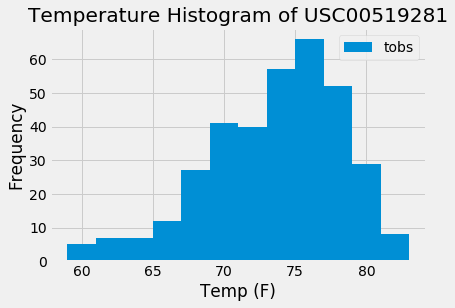

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cur.execute(f"SELECT date, tobs FROM measurement WHERE date > '{new_str}' AND station='{active_station}'")
rows=cur.fetchall()

temp_hist_df=pd.DataFrame(rows, columns=["date","tobs"])

plt.hist(temp_hist_df["tobs"],bins=12)
plt.legend(["tobs"])

# Add title and labels
plt.ylabel('Frequency')
plt.xlabel('Temp (F)')
plt.title(f"Temperature Histogram of {active_station}")

plt.show()


# Choosing the Dates

## Precipitation 

### From veiwing the precipitation graph previously, it appears at the best time to go is late April or early May

### I will choose05-01 to 05-15

## Temperature

### I have decided that when to go doesn't truly affect the temperature by viewing the histogram.

### It all looks pretty pleasant in that range

# Flask Functions

This next area is a place where I can build and test functinons for the flask app

__Flask app is in ./flask_app/app.py__

# Testing code for /api/v1.0/precipitation/

In [78]:
# Function precipitaion for the following path:
# /api/v1.0/precipitation

#@app.route("/api/v1.0/precipitation/")
#def precipitation():
# connect to the db
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()
# select date and precipitation from the db
cur.execute("SELECT date, prcp FROM measurement")
result= cur.fetchall()
# create and add results into the dictionary
precip_dict= {}
{precip_dict.setdefault(key, []).append(precip) for key, precip in result}
#return(jsonify(precip_dict))



{None}

# Testing code for /api/v1.0/stations/

In [93]:
#@app.route("/api/v1.0/stations")
#def stations():
# connect to the db
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()
#select the station data
cur.execute("SELECT station, name, latitude, longitude, elevation FROM station")
results=cur.fetchall()
stations_list=[]
# add the results to a list of dictionaries
for result in results:
    stations_list.append(dict(station=result[0],name=result[1],lattitude=result[2],longitude=result[3],elevation=result[4]))
#    return jsonify(stations_list)




# Testing code for /api/v1.0/tob/

In [91]:
# Function precipitaion for the following path:
# /api/v1.0/tob

#@app.route("/api/v1.0/tob/")
#def tob():
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()

#Find the highest date in the DB
cur.execute("SELECT MAX(date) FROM measurement")
max_date=cur.fetchall()
#Convert to a string
date_str=max_date[0][0]
#Convert to a date format
date_dt=dt.strptime(date_str,'%Y-%m-%d')
#Subtract a year to find the date for the query
new_date=date_dt.replace(date_dt.year-1)
#convert back to string
new_str=new_date.strftime('%Y-%m-%d')

cur.execute(f"SELECT date, tobs FROM measurement WHERE date > '{new_str}'")
result= cur.fetchall()
tobs_dict= {}
{tobs_dict.setdefault(key, []).append(tobs) for key, tobs in result}
#return(jsonify(tobs_dict)

   


{None}

# Testing code for flask app /api/v1.0/&#x3C;start&#x3E;
    
    

In [82]:
# flask app for finding the temp statistics for several dates
#@app.route("/api/v1.0/<start>")
#Input for QA:
start=input()
#def temp_past(start):
try:
    ##This date conversion verifies that the url is properly formatted
    min_date=dt.strptime(start,'%Y-%m-%d')
    ## Connect to db
    conn = sqlite3.connect("./Resources/hawaii.sqlite")
    cur = conn.cursor()

    ## find min and max date on db
    cur.execute("SELECT MIN(date),MAX(date) FROM measurement")
    db_result=cur.fetchall()
    #Convert to a string
    min_str=db_result[0][0]
    max_str=db_result[0][1]

    # Check to see if the date ranges are out of bounds
    if start < min_str:
            results={"error": f"{start} is less than the earliest database date of {min_str}"}
    elif start > max_str:
            results={"error": f"{start} is greater than the latest database date of {max_str}"}
    else:
        #select the aggretate temperatures of the dates greater than start date
        cur.execute(f"SELECT MIN(tobs),MAX(tobs),AVG(tobs) FROM measurement WHERE date >= {start}")
        temp_results=cur.fetchall()
        #format the results for the average of those dates
        results={"start":start,
                 "end":max_str,
                 "TMIN":temp_results[0][0],
                  "TMAX":temp_results[0][1],
                  "TAVG":"{0:.1f}".format(temp_results[0][2])}
#        return jsonify(results),200
except: 
        #return an error if there's a date typo
    results={"error": f"{start} is not date format of YYYY-MM-DD or an API path"}
#        return jsonify(results),404

# This line should be removed in flask file. it's to verify output
print(results)

 2018-01-01


{'error': '2018-01-01 is greater than the latest database date of 2017-08-23'}


# Testing code for flask app /api/v1.0/&#x3C;start&#x3E;/&#x3C;end&#x3E;
    
    

In [95]:
#@app.route("/api/v1.0/<start>/<end>")
#def temp_range(start,end):

#Testing  variables that will be removed from flask app
start=input()
end=input()


try:
    min_date=dt.strptime(start,'%Y-%m-%d')
    max_date=dt.strptime(end,'%Y-%m-%d')

    ## Connect to db
    conn = sqlite3.connect("./Resources/hawaii.sqlite")
    cur = conn.cursor()

    ## find min and max date on db
    cur.execute("SELECT MIN(date),MAX(date) FROM measurement")
    db_result=cur.fetchall()
    #Convert to a string
    min_str=db_result[0][0]
    max_str=db_result[0][1]

    # For date error handling, I have 3 categories, if the start is earlier than the 
    # first db date, if the end is greater than the last db date, and if the start is 
    # greater than the end.
    if start > end:
        results={"error":f"Start date {start} is greater than end date {end}."}
    elif start < min_str:
        results={"error": f"{start} is less than the earliest database date of {min_str}"}
    elif end > max_str:
        results={"error": f"{end} is greater than the latest database date of {max_str}"}
                
    else:
        # find min max and rage of temp for those dates
        cur.execute(f"SELECT MIN(tobs),MAX(tobs),AVG(tobs) FROM measurement WHERE date >= '{start}' AND date <= '{end}' AND tobs IS NOT NULL")
        temp_results=cur.fetchall()
        # return the results
        results={"start":start,
                 "end":end,
                 "TMIN":temp_results[0][0],
                 "TMAX":temp_results[0][1],
                 "TAVG":"{0:.1f}".format(temp_results[0][2])
                  }
#        return jsonify(results),200
except: 
        #return an error if there's a date typo
    results={"error": f"{start} is not date format of YYYY-MM-DD or an API path"}
#        return jsonify(results),404

# This line should be removed in flask file. it's to verify output
results

 2017-05-01
 2017-05-15


{'start': '2017-05-01',
 'end': '2017-05-15',
 'TMIN': 65.0,
 'TMAX': 80.0,
 'TAVG': '75.2'}

## Optional Challenge Assignment

### I declined to do it. It also appears that the jupyter book doesn't match the instructions.

### I deleted the mismathing blocks out of the Notebook
